## EDA의 필요성 -> 
### 1. 우리가 데이터로 얻고자 하는 목표가 무엇인가?
사람의 사진이 주어졌을 때, 마스크를 올바르게 썼는지, 성별은 무엇인지, 연령대는 무엇인지 구분하는 것

### 2. 데이터 분석 전 알 수 있는 기본적인 정보?
픽셀별 데이터는 별도로 제공되지 않음
동일한 사람에 대하여 기본적인 얼굴 1장, 마스크를 올바르게 착용한 얼굴 5장, 마스크를 올바르게 착용하지 않은 얼굴 1장이 주어짐

### 3. 데이터 분석에서 필요한 정보?
다음 단계는 데이터 전처리이므로, 데이터 분석 과정에서 어떠한 전처리가 필요할지 분석
데이터의 불균형이 심하다면 증강을 고려해야 하며, 데이터의 크기가 너무 크면 크기를 조정하는 등

In [1]:
import os

train_data_dir = '../input/data/train/'
eval_data_dir = '../input/data/eval/'

train_csv_dir = train_data_dir + 'train.csv'
eval_csv_dir = eval_data_dir + 'info.csv'

In [2]:
import pandas as pd

train_csv = pd.read_csv(train_csv_dir)
eval_csv = pd.read_csv(eval_csv_dir)

## 데이터는 총 4500개, 그 중 60%인 2700개는 train 데이터셋, 20%, 20%는 대회의 public, private 데이터셋으로 활용

In [3]:
train_csv # 2700개열 데이터가 id, 성별, 인종, 나이, 이미지 경로의 정보를 가지고 있음

,id,gender,race,age,path
0,000001,female,Asian,45,000001_female_Asian_45
1,000002,female,Asian,52,000002_female_Asian_52
2,000004,male,Asian,54,000004_male_Asian_54
3,000005,female,Asian,58,000005_female_Asian_58
4,000006,female,Asian,59,000006_female_Asian_59
...,...,...,...,...,...
2695,006954,male,Asian,19,006954_male_Asian_19
2696,006955,male,Asian,19,006955_male_Asian_19
2697,006956,male,Asian,19,006956_male_Asian_19
2698,006957,male,Asian,20,006957_male_Asian_20


In [4]:
train_csv['gender'].value_counts()

female    1658
male      1042
Name: gender, dtype: int64

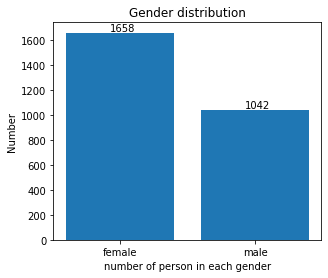

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize = (4.8, 4)) 
plt.xlabel('number of person in each gender')
plt.ylabel('Number')
plt.title('Gender distribution')

plt.bar(['female', 'male'], train_csv['gender'].value_counts())

for i in range(2):
    plt.text(i-0.075, train_csv['gender'].value_counts()[i]+10, train_csv['gender'].value_counts()[i])

plt.show()

## female 1658, male 1042 -> sum 2700

In [6]:
train_csv['race'].value_counts()

Asian    2700
Name: race, dtype: int64

## 인종은 모두 동일

In [7]:
age_30 = len(train_csv.loc[train_csv['age'] < 30])

In [8]:
age_30_60 = len(train_csv.loc[(30 <= train_csv['age']) & (train_csv['age'] < 60)])

In [9]:
age_60 = len(train_csv.loc[train_csv['age'] >= 60])

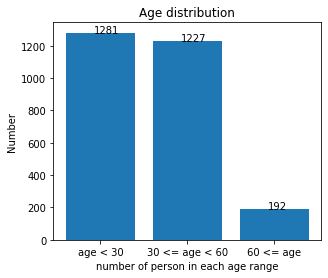

In [10]:
plt.figure(figsize = (4.8, 4)) 
plt.xlabel('number of person in each age range')
plt.ylabel('Number')
plt.title('Age distribution')

plt.bar(['age < 30', '30 <= age < 60', '60 <= age'], [age_30, age_30_60, age_60])

plt.text(0-0.075, age_30, age_30)
plt.text(1-0.075, age_30_60, age_30_60)
plt.text(2-0.075, age_60, age_60)

plt.show()

## 30세 미만 1281명, 30세 이상 60세 미만 1227명, 60세 이상 192명 -> 2700명

## 성별의 분포는 여성이 남성이 1.6배정도 많은 데이터 보유, 나이의 분포는 60세 이상이 다른 나이 분포에 비해 매우 적음

In [11]:
train_image_dir = train_data_dir + 'images/'
train_image_list = os.listdir(train_image_dir)

In [12]:
from PIL import Image

def find_image_size():
    result = 0
    
    for train_image in train_image_list:
        if train_image[:2] == '._':
            continue
            
        train_images_dir = train_image_dir + train_image + '/'
        for image in os.listdir(train_images_dir):
            if image[:2] == '._':
                continue
                
            img = Image.open(train_images_dir + image)
            result += 1
            
            if img.size != (384, 512):
                return result, img.size
            
    return result, (384, 512)

result, size = find_image_size()
if result != 2700 * 7:
    print("탐색한 이미지 수 {}, 도중 이미지의 크기가 {}인 경우를 발견하여 종료".format(result, size))
else:
    print("탐색한 이미지 수 {}, 이미지의 크기는 {}로 균일".format(result, size))

탐색한 이미지 수 18900, 이미지의 크기는 (384, 512)로 균일


## (width, height) = (384, 512) - 가로 세로가 같지 않음, 이미지의 크기가 크지 않음...

In [13]:
male_30 = len(train_csv.loc[(train_csv['gender'] == 'male') & (train_csv['age'] < 30)])
male_30_60 = len(train_csv.loc[(train_csv['gender'] == 'male') & (30 <= train_csv['age']) & (train_csv['age'] < 60)])
male_60 = len(train_csv.loc[(train_csv['gender'] == 'male') & (train_csv['age'] >= 60)])

female_30 = len(train_csv.loc[(train_csv['gender'] == 'female') & (train_csv['age'] < 30)])
female_30_60 = len(train_csv.loc[(train_csv['gender'] == 'female') & (30 <= train_csv['age']) & (train_csv['age'] < 60)])
female_60 = len(train_csv.loc[(train_csv['gender'] == 'female') & (train_csv['age'] >= 60)])

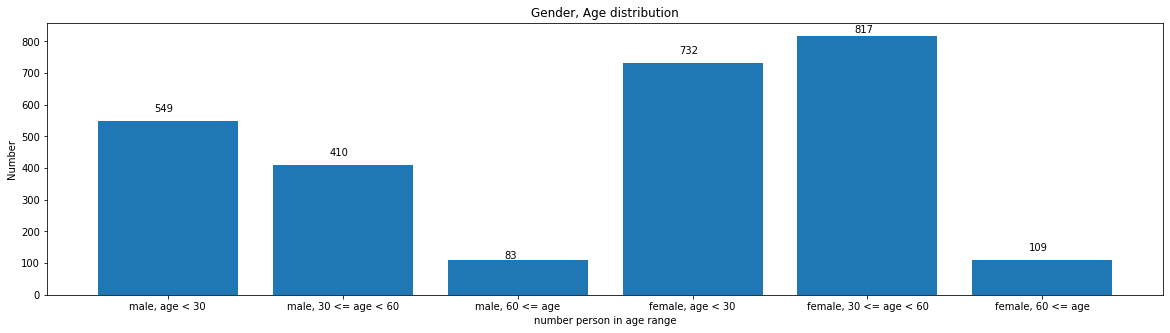

In [14]:
plt.figure(figsize = (20, 5)) 
plt.xlabel('number person in age range')
plt.ylabel('Number')
plt.title('Gender, Age distribution')

plt.bar(['male, age < 30', 'male, 30 <= age < 60', 'male, 60 <= age', 'female, age < 30', 'female, 30 <= age < 60', 'female, 60 <= age'], [male_30, male_30_60, female_60, female_30, female_30_60, female_60])

plt.text(0-0.075, male_30+30, male_30)
plt.text(1-0.075, male_30_60+30, male_30_60)
plt.text(2-0.075, male_60+30, male_60)
plt.text(3-0.075, female_30+30, female_30)
plt.text(4-0.075, female_30_60+10, female_30_60)
plt.text(5-0.075, female_60+30, female_60)

plt.show()

## 성별과 나이를 종합한 데이터 분포.

In [15]:
eval_csv

,ImageID,ans
0,cbc5c6e168e63498590db46022617123f1fe1268.jpg,0
1,0e72482bf56b3581c081f7da2a6180b8792c7089.jpg,0
2,b549040c49190cedc41327748aeb197c1670f14d.jpg,0
3,4f9cb2a045c6d5b9e50ad3459ea7b791eb6e18bc.jpg,0
4,248428d9a4a5b6229a7081c32851b90cb8d38d0c.jpg,0
...,...,...
12595,d71d4570505d6af8f777690e63edfa8d85ea4476.jpg,0
12596,6cf1300e8e218716728d5820c0bab553306c2cfd.jpg,0
12597,8140edbba31c3a824e817e6d5fb95343199e2387.jpg,0
12598,030d439efe6fb5a7bafda45a393fc19f2bf57f54.jpg,0


1800 x 7 개의 public, private dataset이 섞여있는 형태.
이를 예측하여 제출하면 public dataset에 대해서만 공개된 점수를 받을 수 있음. (private dataset의 점수는 대회가 끝난 후 공개)

### 분석이 끝났으니, 증강과 전처리를 적용할지 판단 -> 60대 이상의 정보가 매우 적음... 데이터 증강 필요
어떤 데이터 증강을 적용할 것인가?### 마스크 여부, 성별, 나이를 mapping할 클래스를 생성합니다.

In [16]:
from albumentations import *
from albumentations.pytorch import ToTensorV2


def get_transforms(need=('train', 'val'), img_size=(512, 384), mean=(0.548, 0.504, 0.479), std=(0.237, 0.247, 0.246)):
    """
    train 혹은 validation의 augmentation 함수를 정의합니다. train은 데이터에 많은 변형을 주어야하지만, validation에는 최소한의 전처리만 주어져야합니다.
    
    Args:
        need: 'train', 혹은 'val' 혹은 둘 다에 대한 augmentation 함수를 얻을 건지에 대한 옵션입니다.
        img_size: Augmentation 이후 얻을 이미지 사이즈입니다.
        mean: 이미지를 Normalize할 때 사용될 RGB 평균값입니다.
        std: 이미지를 Normalize할 때 사용될 RGB 표준편차입니다.

    Returns:
        transformations: Augmentation 함수들이 저장된 dictionary 입니다. transformations['train']은 train 데이터에 대한 augmentation 함수가 있습니다.
    """
    transformations = {}
    if 'train' in need:
        transformations['train'] = Compose([
            Resize(img_size[0], img_size[1], p=1.0),
            HorizontalFlip(p=0.5),
            ShiftScaleRotate(p=0.5),
            HueSaturationValue(hue_shift_limit=0.2, sat_shift_limit=0.2, val_shift_limit=0.2, p=0.5),
            RandomBrightnessContrast(brightness_limit=(-0.1, 0.1), contrast_limit=(-0.1, 0.1), p=0.5),
            GaussNoise(p=0.5),
            Normalize(mean=mean, std=std, max_pixel_value=255.0, p=1.0),
            ToTensorV2(p=1.0),
        ], p=1.0)
    if 'val' in need:
        transformations['val'] = Compose([
            Resize(img_size[0], img_size[1]),
            Normalize(mean=mean, std=std, max_pixel_value=255.0, p=1.0),
            ToTensorV2(p=1.0),
        ], p=1.0)
    return transformations

/opt/conda/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [17]:
import torch
import torch.nn as nn
import torch.utils.data as data

from torch.optim.lr_scheduler import StepLR

In [18]:
### 마스크 여부, 성별, 나이를 mapping할 클래스를 생성합니다.
from enum import Enum

class MaskLabels(int, Enum):
    MASK = 0
    INCORRECT = 1
    NORMAL = 2


class GenderLabels(int, Enum):
    MALE = 0
    FEMALE = 1

    @classmethod
    def from_str(cls, value: str) -> int:
        value = value.lower()
        if value == "male":
            return cls.MALE
        elif value == "female":
            return cls.FEMALE
        else:
            raise ValueError(f"Gender value should be either 'male' or 'female', {value}")


class AgeLabels(int, Enum):
    YOUNG = 0
    MIDDLE = 1
    OLD = 2

    @classmethod
    def from_number(cls, value: str) -> int:
        try:
            value = int(value)
        except Exception:
            raise ValueError(f"Age value should be numeric, {value}")

        if value < 30:
            return cls.YOUNG
        elif value < 60:
            return cls.MIDDLE
        else:
            return cls.OLD

In [19]:
class MaskBaseDataset(data.Dataset):
    num_classes = 3 * 2 * 3

    _file_names = {
        "mask1": MaskLabels.MASK,
        "mask2": MaskLabels.MASK,
        "mask3": MaskLabels.MASK,
        "mask4": MaskLabels.MASK,
        "mask5": MaskLabels.MASK,
        "incorrect_mask": MaskLabels.INCORRECT,
        "normal": MaskLabels.NORMAL
    }

    image_paths = []
    mask_labels = []
    gender_labels = []
    age_labels = []

    def __init__(self, img_dir, mean, std, transform=None):
        """
        MaskBaseDataset을 initialize 합니다.

        Args:
            img_dir: 학습 이미지 폴더의 root directory 입니다.
            transform: Augmentation을 하는 함수입니다.
        """
        self.img_dir = img_dir
        self.mean = mean
        self.std = std
        self.transform = transform

        self.setup()

    def set_transform(self, transform):
        """
        transform 함수를 설정하는 함수입니다.
        """
        self.transform = transform
        
    def setup(self):
        """
        image의 경로와 각 이미지들의 label을 계산하여 저장해두는 함수입니다.
        """
        profiles = os.listdir(self.img_dir)
        for profile in profiles:
            if profile.startswith("."):  # "." 로 시작하는 파일은 무시합니다
                continue

            img_folder = os.path.join(self.img_dir, profile)
            for file_name in os.listdir(img_folder):
                _file_name, ext = os.path.splitext(file_name)
                if _file_name not in self._file_names:  # "." 로 시작하는 파일 및 invalid 한 파일들은 무시합니다
                    continue

                img_path = os.path.join(self.img_dir, profile, file_name)  # (resized_data, 000004_male_Asian_54, mask1.jpg)
                mask_label = self._file_names[_file_name]

                id, gender, race, age = profile.split("_")
                gender_label = GenderLabels.from_str(gender)
                age_label = AgeLabels.from_number(age)

                self.image_paths.append(img_path)
                self.mask_labels.append(mask_label)
                self.gender_labels.append(gender_label)
                self.age_labels.append(age_label)

    def __getitem__(self, index):
        """
        데이터를 불러오는 함수입니다. 
        데이터셋 class에 데이터 정보가 저장되어 있고, index를 통해 해당 위치에 있는 데이터 정보를 불러옵니다.
        
        Args:
            index: 불러올 데이터의 인덱스값입니다.
        """
        # 이미지를 불러옵니다.
        image_path = self.image_paths[index]
        image = Image.open(image_path)
        
        # 레이블을 불러옵니다.
        mask_label = self.mask_labels[index]
        gender_label = self.gender_labels[index]
        age_label = self.age_labels[index]
        multi_class_label = mask_label * 6 + gender_label * 3 + age_label
        
        # 이미지를 Augmentation 시킵니다.
        image_transform = self.transform(image=np.array(image))['image']
        return image_transform, multi_class_label

    def __len__(self):
        return len(self.image_paths)

In [20]:
mean, std = (0.5, 0.5, 0.5), (0.2, 0.2, 0.2)
img_dir = '../input/data/train/images'

In [21]:
# 정의한 Augmentation 함수와 Dataset 클래스 객체를 생성합니다.
transform = get_transforms(mean=mean, std=std)

dataset = MaskBaseDataset(
    img_dir=img_dir,
    mean=mean,
    std=std
)

# train dataset과 validation dataset을 8:2 비율로 나눕니다.
n_val = int(len(dataset) * 0.2)
n_train = len(dataset) - n_val
train_dataset, val_dataset = data.random_split(dataset, [n_train, n_val])

# 각 dataset에 augmentation 함수를 설정합니다.
train_dataset.dataset.set_transform(transform['train'])
val_dataset.dataset.set_transform(transform['val'])

In [22]:
batch_size = 64
num_workers = 4

In [23]:
# training dataloader은 데이터를 섞어주어야 합니다. (shuffle=True)
train_loader = data.DataLoader(
    train_dataset,
    batch_size=batch_size,
    num_workers=num_workers,
    shuffle=True
)

val_loader = data.DataLoader(
    val_dataset,
    batch_size=batch_size,
    num_workers=num_workers,
    shuffle=False
)

In [24]:
# -- Callback1: Checkpoint - Accuracy가 높아질 때마다 모델을 저장합니다.
# 학습 코드에서 이어집니다.

# -- Callback2: Early Stopping - 성능이 일정 기간동안 향상이 없을 경우 학습을 종료합니다.
patience = 10
counter = 0
# 학습 코드에서 이어집니다.

In [25]:
# -- Gradient Accumulation
accumulation_steps = 2
# 학습코드에서 이어집니다.

In [26]:
num_epochs = 30

In [27]:
import torchvision
from torchvision.models import alexnet

model = alexnet(pretrained = True)
model.classifier = nn.Sequential(
    nn.Dropout(),
    nn.Linear(256 * 6 * 6, 4096),
    nn.ReLU(True),
    nn.Dropout(),
    nn.Linear(4096, 4096),
    nn.ReLU(True),
    nn.Linear(4096, 18),
)

model.features.requires_grad_(False)

model.to("cuda")

파라미터 features.0.weight    가 gradient 를 tracking 하나요? -> False
파라미터 features.0.bias      가 gradient 를 tracking 하나요? -> False
파라미터 features.3.weight    가 gradient 를 tracking 하나요? -> False
파라미터 features.3.bias      가 gradient 를 tracking 하나요? -> False
파라미터 features.6.weight    가 gradient 를 tracking 하나요? -> False
파라미터 features.6.bias      가 gradient 를 tracking 하나요? -> False
파라미터 features.8.weight    가 gradient 를 tracking 하나요? -> False
파라미터 features.8.bias      가 gradient 를 tracking 하나요? -> False
파라미터 features.10.weight   가 gradient 를 tracking 하나요? -> False
파라미터 features.10.bias     가 gradient 를 tracking 하나요? -> False
파라미터 classifier.1.weight  가 gradient 를 tracking 하나요? -> True
파라미터 classifier.1.bias    가 gradient 를 tracking 하나요? -> True
파라미터 classifier.4.weight  가 gradient 를 tracking 하나요? -> True
파라미터 classifier.4.bias    가 gradient 를 tracking 하나요? -> True
파라미터 classifier.6.weight  가 gradient 를 tracking 하나요? -> True
파라미터 classifier.6.bias    가 gradient 를 tracking 하나요? -> True


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [28]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [29]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
criterion = nn.CrossEntropyLoss()

train_log_interval = 24

name = "Alexnet"
os.makedirs(os.path.join(os.getcwd(), 'results', name), exist_ok=True)

counter = 0
best_val_acc = 0
best_val_loss = np.inf
for epoch in range(num_epochs):
    # train loop
    model.train()
    loss_value = 0
    matches = 0
    for idx, train_batch in enumerate(train_loader):
        inputs, labels = train_batch
        inputs = inputs.to(device)
        labels = labels.to(device)

        outs = model(inputs)
        preds = torch.argmax(outs, dim=-1)
        loss = criterion(outs, labels)

        loss.backward()
        
        # -- Gradient Accumulation
        if (idx+1) % accumulation_steps == 0:
            optimizer.step()
            optimizer.zero_grad()

        loss_value += loss.item()
        matches += (preds == labels).sum().item()
        if (idx + 1) % train_log_interval == 0:
            train_loss = loss_value / train_log_interval
            train_acc = matches / batch_size / train_log_interval
            print(
                f"Epoch[{epoch}/{num_epochs}]({idx + 1}/{len(train_loader)}) || "
                f"training loss {train_loss:4.4} || training accuracy {train_acc:4.2%}"
            )

            loss_value = 0
            matches = 0


    # val loop
    with torch.no_grad():
        print("Calculating validation results...")
        model.eval()
        val_loss_items = []
        val_acc_items = []
        for val_batch in val_loader:
            inputs, labels = val_batch
            inputs = inputs.to(device)
            labels = labels.to(device)

            outs = model(inputs)
            preds = torch.argmax(outs, dim=-1)

            loss_item = criterion(outs, labels).item()
            acc_item = (labels == preds).sum().item()
            val_loss_items.append(loss_item)
            val_acc_items.append(acc_item)

        val_loss = np.sum(val_loss_items) / len(val_loader)
        val_acc = np.sum(val_acc_items) / len(val_dataset)
        
        # Callback1: validation accuracy가 향상될수록 모델을 저장합니다.
        if val_loss < best_val_loss:
            best_val_loss = val_loss
        if val_acc > best_val_acc:
            print("New best model for val accuracy! saving the model..")
            torch.save(model.state_dict(), f"results/{name}/{epoch:03}_accuracy_{val_acc:4.2%}.ckpt")
            best_val_acc = val_acc
            counter = 0
        else:
            counter += 1
        # Callback2: patience 횟수 동안 성능 향상이 없을 경우 학습을 종료시킵니다.
        if counter > patience:
            print("Early Stopping...")
            break
        
        
        print(
            f"[Val] acc : {val_acc:4.2%}, loss: {val_loss:4.2} || "
            f"best acc : {best_val_acc:4.2%}, best loss: {best_val_loss:4.2}"
        )

Epoch[0/30](24/237) || training loss 2.395 || training accuracy 23.70%
Epoch[0/30](48/237) || training loss 2.153 || training accuracy 33.14%
Epoch[0/30](72/237) || training loss 2.065 || training accuracy 36.00%
Epoch[0/30](96/237) || training loss 1.833 || training accuracy 41.86%
Epoch[0/30](120/237) || training loss 1.763 || training accuracy 43.62%
Epoch[0/30](144/237) || training loss 1.625 || training accuracy 50.46%
Epoch[0/30](168/237) || training loss 1.431 || training accuracy 54.49%
Epoch[0/30](192/237) || training loss 1.348 || training accuracy 58.14%
Epoch[0/30](216/237) || training loss 1.24 || training accuracy 61.46%
Calculating validation results...
New best model for val accuracy! saving the model..
[Val] acc : 65.63%, loss:  1.1 || best acc : 65.63%, best loss:  1.1
Epoch[1/30](24/237) || training loss 1.21 || training accuracy 62.24%
Epoch[1/30](48/237) || training loss 1.071 || training accuracy 65.95%
Epoch[1/30](72/237) || training loss 1.075 || training accura